In [41]:
import pandas as pd
import numpy as np

# Import and read the data¶

In [42]:
data = pd.read_csv("/Users/tiagovhp/Ironhack/Week_5/Project/sales.csv")
data.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [43]:
# Overview on the data
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  object
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


# Preprocessing of data

In [44]:
## 1. 'state_holiday' -> one hot encode to state_holiday_a, state_holiday_b, state_holiday_c
data['state_holiday'].unique()
data = pd.get_dummies(data, columns=['state_holiday'], prefix = 'state_holiday', drop_first = True)


In [45]:
## 2. trasnform date into an integer
data['date'] = data['date'].str.replace("-" , "").astype("int64")

In [46]:
## 3. 'day_of_week' -> one hot encoding
data = pd.get_dummies(data, columns=['day_of_week'], prefix = 'day_of_week', drop_first = False)


In [47]:
### Replace boolean with 1 and o
data = data.replace({True: 1, False: 0})



/var/folders/67/kwhhh9lj76v79c9zbkp29ms40000gn/T/ipykernel_67779/3863822149.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [48]:
#lets drop 'Unnamed: 0' column

data = data.drop(columns='Unnamed: 0')


In [49]:
data.head()

,store_ID,date,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_a,state_holiday_b,state_holiday_c,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
0,366,20130418,517,1,0,0,4422,0,0,0,0,0,0,1,0,0,0
1,394,20150411,694,1,0,0,8297,0,0,0,0,0,0,0,0,1,0
2,807,20130829,970,1,1,0,9729,0,0,0,0,0,0,1,0,0,0
3,802,20130528,473,1,1,0,6513,0,0,0,0,1,0,0,0,0,0
4,726,20131010,1068,1,1,0,10882,0,0,0,0,0,0,1,0,0,0


# Corretalation between features

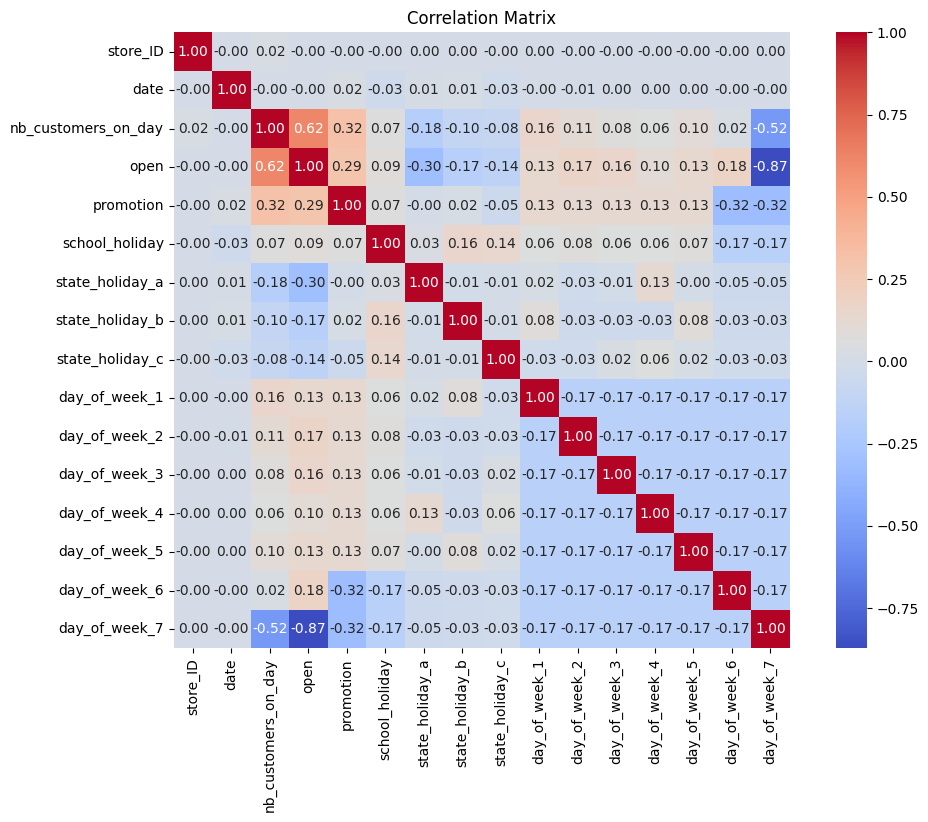

In [50]:
# Correlation Matrix
corr_matrix = data.drop(columns=['sales']).corr()

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [51]:
## Note: We have a high correlation (0.87 ‰) between 'open' and 'day_of_week_7' but we will keep it.

In [52]:
# Separate between features and labels for model generation
features = data.drop(columns=['sales'])
labels = data['sales']

# Supervised Learning

Step 1: Type of model : Regression or Classification -> we choose a regression because we want to prefict a continues value (sales)

In [54]:
# Split the data into training and test for final model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.2)

# Feature scalling

In [55]:
# Standardize the features columns
from sklearn.preprocessing import StandardScaler


# Instantiate the scaler
scaler = StandardScaler()

# Standardize the training data only
X_train = scaler.fit_transform(X_train)

# Standardize the test data using stats of train data (avoid leakage or influence of test data in the model)
X_test = scaler.transform(X_test)

# Convert back into pandas DataFrame
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)


Step 2: Choose the model We will start by selection several models to compare:

Linear Regression
Random Forest
XGBoost
Support Vector Machines (SVM)
(Neural Networks)
we will compare general performance metrics for all these models and choose two with the best score.

In [56]:
# Import the with the relevant models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Import libraries for cross validation of models
from sklearn.model_selection import cross_val_score

# Import the libraries with performance metrics functions
from sklearn.metrics import  r2_score


In [57]:
models= {"Linear Regression": LinearRegression(),
         "SVR": SVR(),
         "SVR_linear": SVR(kernel = "linear"),
         "Decision Tree ": DecisionTreeRegressor(),
         "Decision Tree max_depth=4": DecisionTreeRegressor(max_depth=4),
         "Decision Tree max_depth=5": DecisionTreeRegressor(max_depth=5),
         "Decision Tree max_depth=10": DecisionTreeRegressor(max_depth=10),
         "Random Forest n_estim=200": RandomForestRegressor(n_estimators=200),
         "Random Forest n_estim=100": RandomForestRegressor(),
         "Random Forest n_estim=50": RandomForestRegressor(n_estimators=50),
         "XGBoost" : XGBRegressor()
}



In [58]:
for name, model in models.items():
    score = cross_val_score(model,X_train.head(2000),y_train.head(2000),cv=5, scoring = 'r2')
    print(name,":",np.mean(score))

Linear Regression : 0.8475987493089411
SVR : 0.02709314145541164
SVR_linear : 0.6552569201061587
Decision Tree  : 0.716365122816026
Decision Tree max_depth=4 : 0.8139603027967901
Decision Tree max_depth=5 : 0.8214319086811894
Decision Tree max_depth=10 : 0.7539225993698861
Random Forest n_estim=200 : 0.8532837251836748
Random Forest n_estim=100 : 0.8522155300205181
Random Forest n_estim=50 : 0.8510295732285419
XGBoost : 0.8505860328674316


After a quick performance evaluation, we choose two models: Linear Regression and Random Forest. Now we will optimize by hyperparameter assessing.

# Hyperparameter tuning

In [59]:
# import required libraries
from sklearn.model_selection import GridSearchCV

In [60]:
#let's define a sample size of the training data for hyperparameter tuning
sample_size = len(X_train)//50
sample_size

10253

Hyperparameter Grids

In [61]:
# Create Hyperparameter Grid for Random forest
param_grid_rf = {
    'n_estimators': [125, 150, 175],
    'max_depth': [5, 8, 150],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt', 'log2']
}

In [62]:
# Create Hyperparameter Grid for Gradient Boost 
param_grid_gb = {
    'n_estimators': [75,100,125, 150, 175, 200, 250],  # Number of trees
    'learning_rate': [ 0.3],  # Step size shrinkage
    #'max_depth': [3, 5, 7],  # Depth of each tree
    #'min_samples_split': [2, 10],  # Minimum samples to split
    #'min_samples_leaf': [1],  # Minimum samples at a leaf node
    #'subsample': [0.8, 1.0]  # Fraction of samples for training
}

In [63]:
# Create Hyperparameter Grid for Linear Regression
# Linear Regression does not have hyperparameters to otimize

Grid Search

In [64]:
# Random Forest Grid search
from sklearn.model_selection import GridSearchCV

grid_search_rf = GridSearchCV(estimator = RandomForestRegressor(),
                              param_grid = param_grid_rf,
                              cv=5,
                              scoring = 'r2',
                              verbose=3)

In [65]:
# Gradient Boost Grid search
from sklearn.model_selection import GridSearchCV

grid_search_gb = GridSearchCV(estimator=XGBRegressor(), 
                               param_grid=param_grid_gb, 
                               cv=5,  # 5-fold cross-validation
                               scoring='r2',  # optimize for MSE
                               verbose=3)  # display progress

Fit the grid search (multiple fits) and search for best hyperparameter combination

In [66]:
tuned_rf = grid_search_rf.fit(X_train.head(sample_size), y_train.head(sample_size))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....max_depth=5, n_estimators=125;, score=0.859 total time=   0.7s
[CV 2/5] END .....max_depth=5, n_estimators=125;, score=0.851 total time=   0.7s
[CV 3/5] END .....max_depth=5, n_estimators=125;, score=0.873 total time=   0.7s
[CV 4/5] END .....max_depth=5, n_estimators=125;, score=0.872 total time=   0.7s
[CV 5/5] END .....max_depth=5, n_estimators=125;, score=0.851 total time=   0.7s
[CV 1/5] END .....max_depth=5, n_estimators=150;, score=0.858 total time=   0.8s
[CV 2/5] END .....max_depth=5, n_estimators=150;, score=0.850 total time=   0.8s
[CV 3/5] END .....max_depth=5, n_estimators=150;, score=0.874 total time=   0.8s
[CV 4/5] END .....max_depth=5, n_estimators=150;, score=0.872 total time=   0.8s
[CV 5/5] END .....max_depth=5, n_estimators=150;, score=0.850 total time=   0.8s
[CV 1/5] END .....max_depth=5, n_estimators=175;, score=0.859 total time=   1.0s
[CV 2/5] END .....max_depth=5, n_estimators=175;,

In [67]:
tuned_gb = grid_search_gb.fit(X_train.head(sample_size), y_train.head(sample_size))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END learning_rate=0.3, n_estimators=75;, score=0.901 total time=   0.1s
[CV 2/5] END learning_rate=0.3, n_estimators=75;, score=0.890 total time=   0.1s
[CV 3/5] END learning_rate=0.3, n_estimators=75;, score=0.901 total time=   0.1s
[CV 4/5] END learning_rate=0.3, n_estimators=75;, score=0.899 total time=   0.1s
[CV 5/5] END learning_rate=0.3, n_estimators=75;, score=0.884 total time=   0.1s
[CV 1/5] END learning_rate=0.3, n_estimators=100;, score=0.902 total time=   0.1s
[CV 2/5] END learning_rate=0.3, n_estimators=100;, score=0.890 total time=   0.1s
[CV 3/5] END learning_rate=0.3, n_estimators=100;, score=0.901 total time=   0.1s
[CV 4/5] END learning_rate=0.3, n_estimators=100;, score=0.898 total time=   0.1s
[CV 5/5] END learning_rate=0.3, n_estimators=100;, score=0.884 total time=   0.1s
[CV 1/5] END learning_rate=0.3, n_estimators=125;, score=0.901 total time=   0.2s
[CV 2/5] END learning_rate=0.3, n_estimator

In [68]:
lr = models['Linear Regression'].fit(X_train,y_train)

Check the Best Hyperparameters: 

In [69]:
print("Best Random Forest Hyperparameters:", grid_search_rf.best_params_)
print("Best Random Forest r2 Score:", grid_search_rf.best_score_) 

Best Random Forest Hyperparameters: {'max_depth': 150, 'n_estimators': 175}
Best Random Forest r2 Score: 0.8758162971155456


In [70]:
lr_score = cross_val_score(models["Linear Regression"],X_train,y_train,cv=5, scoring = 'r2')
print("Linear regression r2 Score:", lr_score.mean())

Linear regression r2 Score: 0.8579307759457533


In [71]:
print("Best Gradient Boosting Hyperparameters:", grid_search_gb.best_params_)
print("Best Gradient Boosting r2 Score :", grid_search_gb.best_score_)

Best Gradient Boosting Hyperparameters: {'learning_rate': 0.3, 'n_estimators': 100}
Best Gradient Boosting r2 Score : 0.8950519680976867


# Model test (with the best hyperparameters)

In [72]:
# We now train the best model (gradient boosting) with the best hyperparameters and the whole data

#Instantiate the model
trained_model = XGBRegressor(n_estimators=125, learning_rate=0.3)

# Fit the model to the whole training data
trained_model.fit(X_train, y_train)

# Now we test with the test set
y_pred = trained_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

print(f'R^2 Score: {r2:.2f}')


R^2 Score: 0.93


# Saving model

In [73]:
import pickle

# Save the model 
pickle.dump(trained_model, open("trained_model.pkl","wb"))

# Save the scaler ->  to be used when making predictions on new data
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)